# Prediction using Monte Carlo Simulation

In [64]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [65]:
# creating an empty list
ticker = []
 
print('Enter the Ticker of the stock:')
ele = str(input())
ticker.append(ele+'.NS') # adding the element
print(ticker)


Enter the Ticker of the stock:
ITC
['ITC.NS']


In [66]:
intervals = 0
iterations = 0

intervals = int(input('Enter the period of forecast'))
iterations = int(input('Enter the no. of iterations'))
 

Enter the period of forecast1095
Enter the no. of iterations10


In [67]:
date_entry = input('Enter a date in YYYY-MM-DD format')
year, month, day = map(int, date_entry.split('-'))
start = dt.date(year, month, day)

Enter a date in YYYY-MM-DD format2015-1-1


In [68]:
data = pdr.get_data_yahoo(ticker, start)

In [69]:
data = data['Adj Close']
data

Symbols,ITC.NS
Date,
2015-01-01,204.595123
2015-01-02,205.235962
2015-01-05,206.043991
2015-01-06,200.750092
2015-01-07,197.016510
...,...
2021-11-08,229.800003
2021-11-09,228.750000
2021-11-10,230.850006


## Calculating Log Returns 

In [70]:
# Calculating Log returns using new formula

log_return = np.log(data / data.shift())
log_return

Symbols,ITC.NS
Date,
2015-01-01,NaN
2015-01-02,0.003127
2015-01-05,0.003929
2015-01-06,-0.026029
2015-01-07,-0.018773
...,...
2021-11-08,0.032507
2021-11-09,-0.004580
2021-11-10,0.009138


<AxesSubplot:xlabel='Date'>

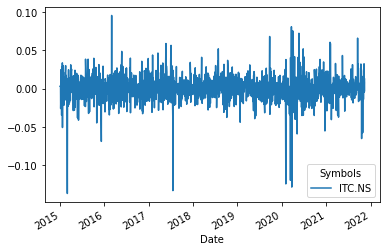

In [71]:
log_return.plot()

## Calculating Drift

In [72]:
u = log_return.mean()
u

Symbols
ITC.NS    0.000077
dtype: float64

In [73]:
var = log_return.var()
std_lr = log_return.std()


In [74]:
drift = (u - (0.5 * var))
drift

Symbols
ITC.NS   -0.000073
dtype: float64

In [75]:
#Converting both the series to numpy array

d= np.array(drift)
s = np.array(std_lr)

In [76]:
z = norm.ppf(np.random.rand(intervals, iterations))
z

array([[-0.21782827, -0.04539276,  0.7320339 , ...,  0.58573503,
        -1.41653621,  0.00542501],
       [ 0.71466818, -0.09007905,  0.9242597 , ...,  0.27121469,
        -0.84819684, -0.49404091],
       [ 0.0444118 ,  0.31777937,  0.40088665, ..., -2.75171452,
        -1.36306277, -0.83187666],
       ...,
       [-0.31400467,  0.55199946,  2.09665513, ...,  0.36967735,
         0.2256972 , -1.36826412],
       [ 0.21368178, -0.17980192,  0.69360003, ...,  1.37603813,
         0.72283868, -0.07923292],
       [ 0.02585209,  1.40860125, -0.76594645, ...,  0.94156656,
         1.09459577, -0.15832264]])

In [77]:
d_returns = np.exp(d + s * z)

In [78]:
s0 = data.iloc[-1]

In [79]:
price_list = np.zeros_like(d_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
price_list[0] = s0
price_list

array([[232.8999939, 232.8999939, 232.8999939, ..., 232.8999939,
        232.8999939, 232.8999939],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

## Running the Simulation 

In [81]:
for t in range(1, intervals):
    price_list[t] = price_list[t-1] * d_returns[t]

In [82]:
price_list

array([[232.8999939 , 232.8999939 , 232.8999939 , ..., 232.8999939 ,
        232.8999939 , 232.8999939 ],
       [235.78465002, 232.51968589, 236.64248916, ..., 233.97987142,
        229.48527167, 230.8978428 ],
       [235.94883399, 233.78635085, 238.27448509, ..., 223.06923804,
        224.11232573, 227.5768213 ],
       ...,
       [163.61789701, 117.70637057, 226.44248028, ..., 205.52307144,
        110.94264511, 185.35427492],
       [164.21275468, 117.33161425, 229.16348311, ..., 210.46675532,
        112.33266215, 185.08638601],
       [164.27426395, 120.22174033, 226.12558184, ..., 213.91290683,
        114.47511656, 184.56578166]])

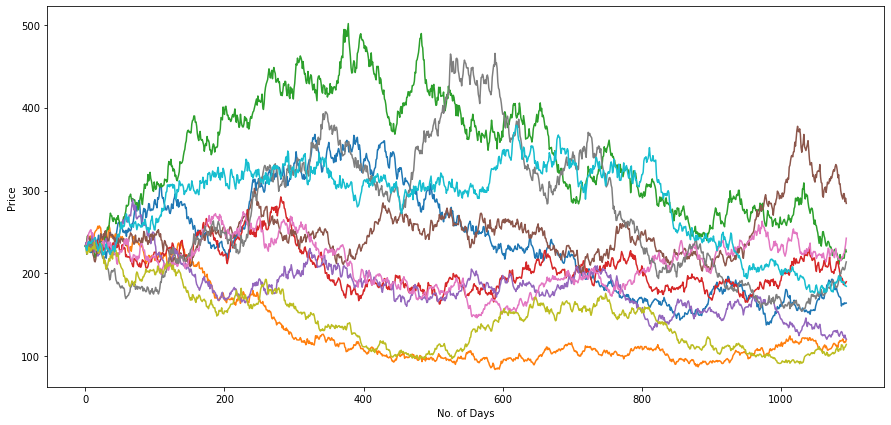

In [84]:
plt.figure(figsize=(15,7))
plt.xlabel("No. of Days")
plt.ylabel("Price")
plt.plot(price_list)
plt.show()